In [1]:
import pandas as pd
import altair as alt
import numpy as np

from set_up_grasp_models import check_thermodynamic_feasibility

# comment the following line if you're using jupyter lab, uncomment if you're using jupyter notebook
#alt.renderers.enable('notebook')

In [2]:
file_in = 'models/HMP2360_r0_t0.xlsx'
data_dict = pd.read_excel(file_in, sheet_name=None)
flag, flux_df, dG_df = check_thermodynamic_feasibility(data_dict) 


Checking if fluxes and Gibbs energies are compatible.

Everything seems to be OK.


In [3]:
dG_df['rxn'] = dG_df.index


flux_df['rxn'] = flux_df.index
flux_df['flux_min'] = flux_df['MBo10_mean'] - flux_df['MBo10_std']
flux_df['flux_max'] = flux_df['MBo10_mean'] + flux_df['MBo10_std']
flux_df['flux'] = flux_df['MBo10_mean']

In [4]:
def plot_dG_and_flux(dG_df, flux_df, height=400, width=600):
    threshold_df = pd.DataFrame([{"ThresholdValue": 0, "Threshold": "hazardous"}])
    
    rect_dG = alt.Chart(dG_df).mark_rect().encode(
        y ='rxn:N',
        x='∆G_min',
        x2='∆G_max'
    ).properties(
        height=height,
        width=width
    )

    point_dG = alt.Chart(dG_df).mark_point(size=100, color='red', filled=True).encode(
        y ='rxn:N',
        x='∆G_mean',
        tooltip=['rxn', '∆G_mean']
    ).interactive()


    rule_dG = alt.Chart(threshold_df).mark_rule().encode(
        x='ThresholdValue:Q'
    )


    rect_flux = alt.Chart(flux_df).mark_rect().encode(
        y ='rxn:N',
        x='flux_min:Q',
        x2='flux_max:Q'
    ).properties(
        height=height,
        width=width
    )

    point_flux = alt.Chart(flux_df).mark_point(size=100, color='red', filled=True).encode(
        y ='rxn:N',
        x='flux',
        tooltip=['rxn', 'flux']
    ).interactive()


    rule_flux = alt.Chart(threshold_df).mark_rule().encode(
        x='ThresholdValue:Q'
    )

    return alt.hconcat(rect_dG + point_dG + rule_dG, rect_flux + point_flux + rule_flux)


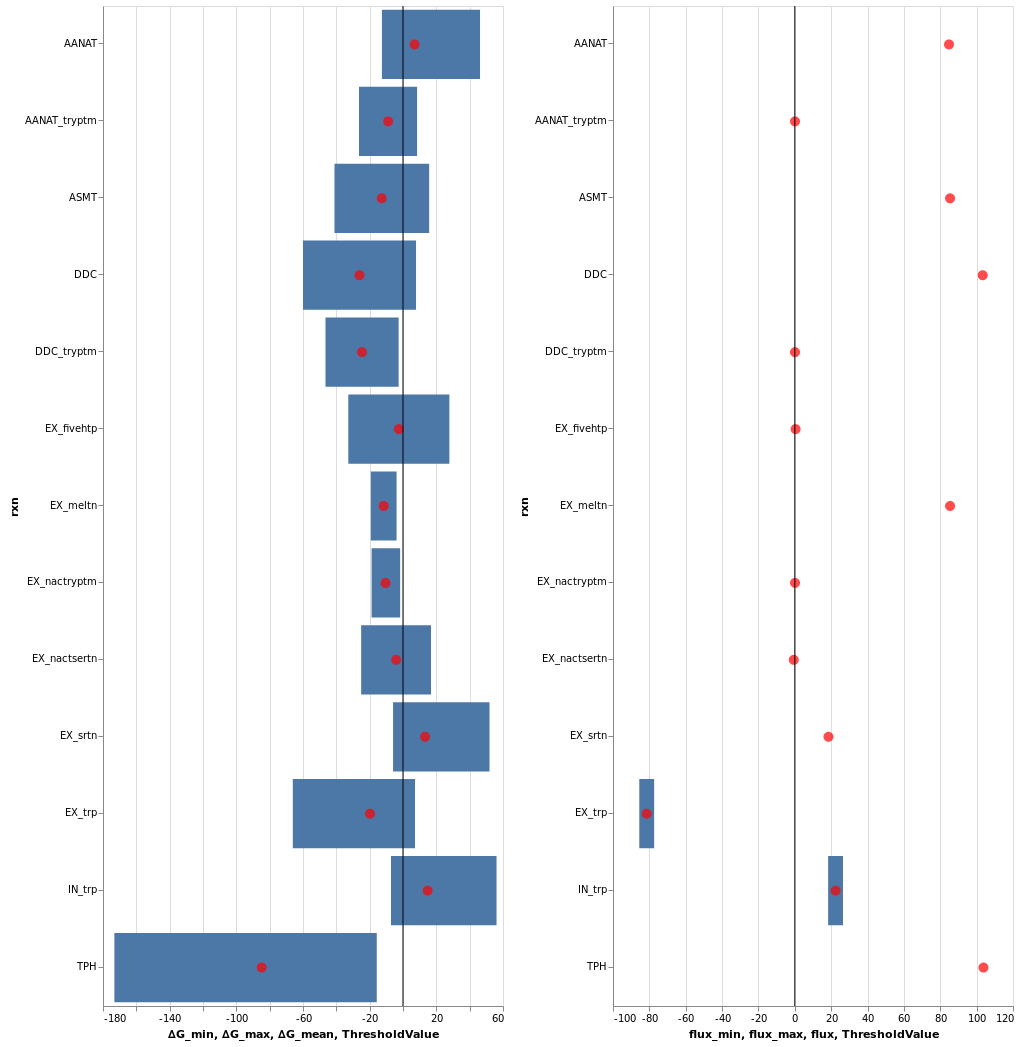

In [5]:
height=1000
width=400
plot_dG_and_flux(dG_df,  flux_df, height, width)